# 1. MLP for cardiovascular disease data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import calibration as cal
from Dataset import Dataset

In [2]:
random_seed = 0
np.random.seed(random_seed)

In [3]:
from sklearn.calibration import calibration_curve
from sklearn import tree

In [4]:
df = pd.read_csv('data/cardio_out.csv', index_col=0)
df=df[df['age']>32]
df['Age'] = df['age']
df = Dataset(df, cal_size=6000)
var='Age'

In [5]:
print("uncalibrated ECE=",df.compute_ECE())
print("Kumar ECE=",df.compute_ECE(label="_kumar"))
print("Beta ECE=",df.compute_ECE(label="_beta"))
print("Log ECE=",df.compute_ECE(label="_log"))

uncalibrated ECE= 0.021135202907301216
Kumar ECE= 0.024359720305307257
Beta ECE= 0.02742992930709489
Log ECE= 0.007422400699267536


In [6]:
b = [0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [7]:
df.df['bin'] = pd.cut(df.df['prob_1_log'], bins=b, duplicates='raise')
grouped = df.df.groupby('bin').aggregate({'prob_1_log':'mean','actual':'mean', 'prob_0':'count'})

In [8]:
y = grouped['actual']
s = grouped['prob_1_log']

In [9]:
widths=[b[i+1] -b[i] for i in range(len(b)-1)]

In [10]:
data = df.df['prob_1_log']

In [11]:
x = [(b[i] +b[i+1])/2 for i in range(len(b)-1)]

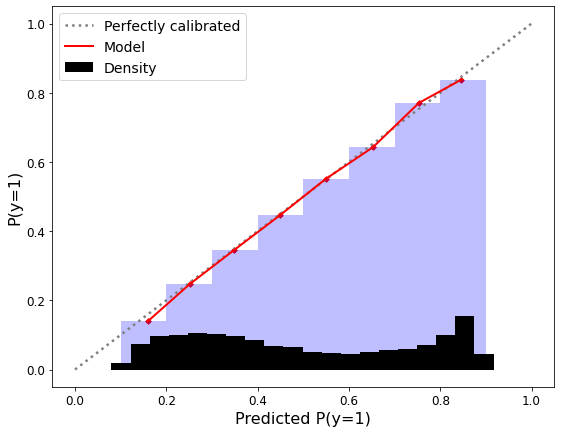

In [12]:
f, ax1 = plt.subplots(1, 1, figsize=(9,7))
ax1.plot([0, 1], [0, 1], ":", label="Perfectly calibrated", color='gray',linewidth=2.5)
ax1.plot(s, y,color='red',linewidth=2, label="Model")
ax1.scatter(s, y,color='red',marker="D",s=15)
ax1.bar(x, y, width=0.1, color='blue', alpha=0.25)

(counts, bins) = np.histogram(data, bins=20)
ax1.hist(bins[:-1], bins, weights=0.0001*counts, color='black', label="Density")

ax1.set_ylabel("P(y=1)", fontsize=16)
ax1.set_xlabel("Predicted P(y=1)", fontsize=16)
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="upper left", prop={'size': 14})

ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='minor', labelsize=12)

plt.show()

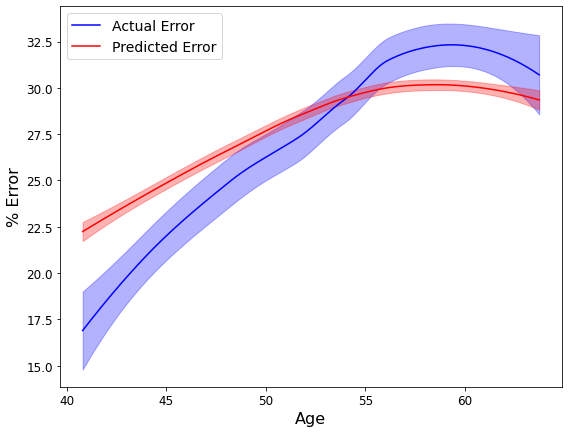

In [13]:
_ = df.gen_plot_lowess(var=var, label="_log", s=0.8)

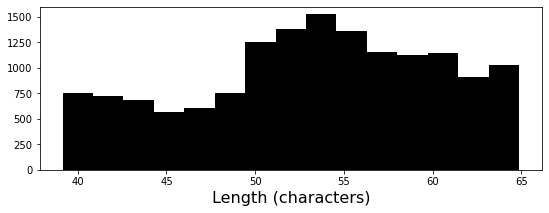

In [14]:
f, ax1 = plt.subplots(1, 1, figsize=(9,3))
ax1.hist(df.df[var], bins=15, color='black')
ax1.set_xlabel("Length (characters)", fontsize=16)
plt.savefig('demo.png', transparent=True)